In [1]:
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


In [3]:
weight = 0.8
bias = 0.2

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:

def plot_predictions(train_data = X_train, train_label = y_train, test_data = X_test, test_label = y_test, predictions = None):
	
    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_label, c="k", s=4, label="Training data")
    plt.scatter(test_data, test_label, c="r", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="b", s=4, label="Predictions")
	
    plt.legend(prop={"size": 14})

40 10 40 10


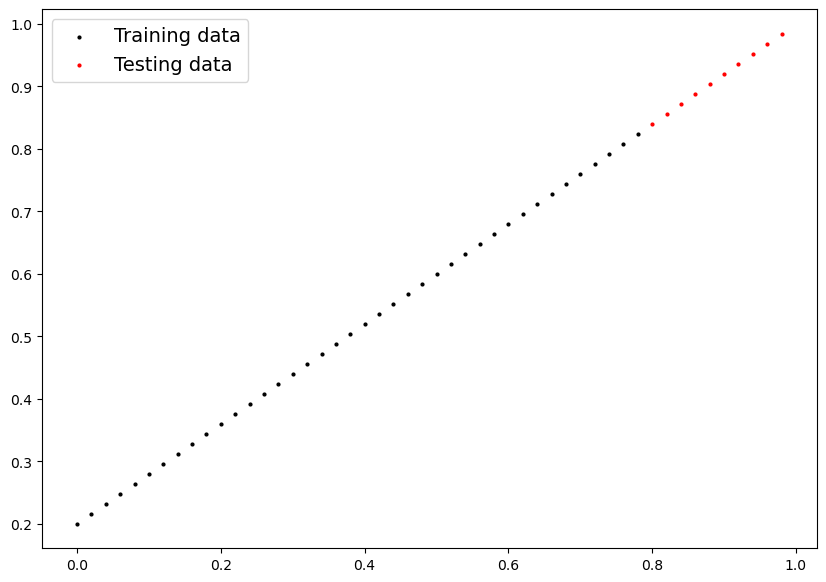

In [5]:

print(len(X_train), len(X_test), len(y_train), len(y_test))

plot_predictions(X_train, y_train, X_test, y_test) 


In [6]:

class LinearReg(nn.Module):
	def __init__(self):
		super().__init__()
		self.linear_layer = nn.Linear(in_features = 1, 
				out_features = 1)
	def forward(self, x: torch.Tensor) -> torch.Tensor:
		return self.linear_layer(x)
		
torch.manual_seed(42)
model1 = LinearReg()
model1, model1.state_dict()

(LinearReg(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [7]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model1.parameters(), lr = 0.01)

In [8]:
next(model1.parameters()).device

device(type='cpu')

In [9]:
model1.to(device)

LinearReg(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [10]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [11]:
torch.manual_seed(42)

epochs = 300

for epoch in range(epochs):
	
	model1.train()

	y_pred = model1(X_train)

	loss = loss_fn(y_pred, y_train)

	optimizer.zero_grad()

	loss.backward()

	optimizer.step()

	model1.eval()

	with torch.inference_mode():
		test_pred = model1(X_test)

		test_loss = loss_fn(test_pred, y_test)

	if epoch % 10 == 0:
		print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.6161779165267944 | Test Loss: 0.5849762558937073
Epoch: 10 | Loss: 0.5009680986404419 | Test Loss: 0.45026642084121704
Epoch: 20 | Loss: 0.3857581913471222 | Test Loss: 0.3155565857887268
Epoch: 30 | Loss: 0.2705483138561249 | Test Loss: 0.180846706032753
Epoch: 40 | Loss: 0.15533843636512756 | Test Loss: 0.046136897057294846
Epoch: 50 | Loss: 0.05875825881958008 | Test Loss: 0.06886561214923859
Epoch: 60 | Loss: 0.04580378159880638 | Test Loss: 0.09473040699958801
Epoch: 70 | Loss: 0.041819483041763306 | Test Loss: 0.09405827522277832
Epoch: 80 | Loss: 0.03831038996577263 | Test Loss: 0.08853326737880707
Epoch: 90 | Loss: 0.034879546612501144 | Test Loss: 0.08094760775566101
Epoch: 100 | Loss: 0.03144557774066925 | Test Loss: 0.07267507165670395
Epoch: 110 | Loss: 0.028006771579384804 | Test Loss: 0.06440252810716629
Epoch: 120 | Loss: 0.024577612057328224 | Test Loss: 0.056816864758729935
Epoch: 130 | Loss: 0.021141953766345978 | Test Loss: 0.04854437708854675
Epoc

In [12]:
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [13]:
print("The model learned the following values for weights and bias:")
print(model1.state_dict())
print("And the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')), ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])
And the original values for weights and bias are:
weights: 0.8, bias: 0.2


In [14]:
model1.eval()
with torch.inference_mode():
    y_preds = model1(X_test)

y_preds.cpu()

tensor([[0.8484],
        [0.8644],
        [0.8804],
        [0.8964],
        [0.9123],
        [0.9283],
        [0.9443],
        [0.9603],
        [0.9762],
        [0.9922]])

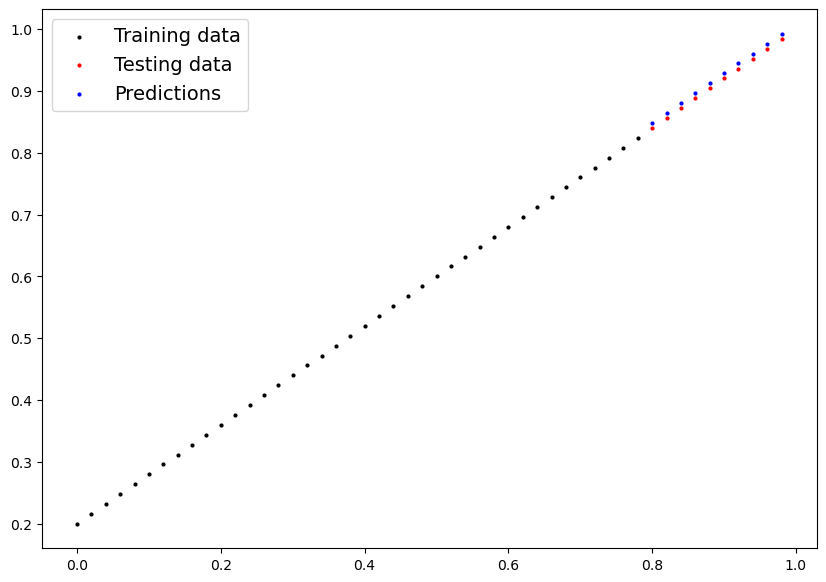

In [15]:
plot_predictions(predictions=y_preds.cpu())

In [17]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = 'True')

MODEL_NAME = "workflow_model1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model1, f = MODEL_SAVE_PATH)


Saving model to models/workflow_model1.pth


In [22]:
loadedmodel1 = LinearReg()

loadedmodel1 = torch.load((MODEL_SAVE_PATH))

loadedmodel1.to(device)

print(f"Loaded Model: \n {loadedmodel1}")
print(f"Device: \n {next(loadedmodel1.parameters()).device}")

Loaded Model: 
 LinearReg(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Device: 
 cuda:0


In [23]:
loadedmodel1.eval()

with torch.inference_mode():
    loadedmodel1_preds = loadedmodel1(X_test)

y_preds == loadedmodel1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')